In [1]:
from protrend.utils import NeoDatabase, Settings

neo_db = NeoDatabase(user_name=Settings.db_user_name, password=Settings.db_password,
                     ip=Settings.db_ip, port=Settings.db_port)
neo_db.connect()

In [18]:
import pandas as pd

# organism out-degree distribution
organism_dfs = []
for label in ('Regulator', 'Gene', 'TFBS', 'RegulatoryInteraction'):

    res = neo_db.db.cypher_query(f"match(o:Organism)-[]-(r:{label}) return o.protrend_id, count(distinct(r.protrend_id))")

    tmp = pd.DataFrame(res[0], columns=['Organism', 'Out-Degree (Kout)'])
    quantile = tmp['Out-Degree (Kout)'].quantile(0.95)
    tmp = tmp[tmp['Out-Degree (Kout)'] < quantile]
    tmp['label'] = label

    organism_dfs.append(tmp)

organism_degree = pd.concat(organism_dfs, ignore_index=True)
organism_degree

,Organism,Out-Degree (Kout),label
0,PRT.ORG.0000002,1,Regulator
1,PRT.ORG.0000003,1,Regulator
2,PRT.ORG.0000004,1,Regulator
3,PRT.ORG.0000005,27,Regulator
4,PRT.ORG.0000006,66,Regulator
...,...,...,...
2030,PRT.ORG.0000609,223,RegulatoryInteraction
2031,PRT.ORG.0000610,199,RegulatoryInteraction
2032,PRT.ORG.0000611,414,RegulatoryInteraction
2033,PRT.ORG.0000612,306,RegulatoryInteraction


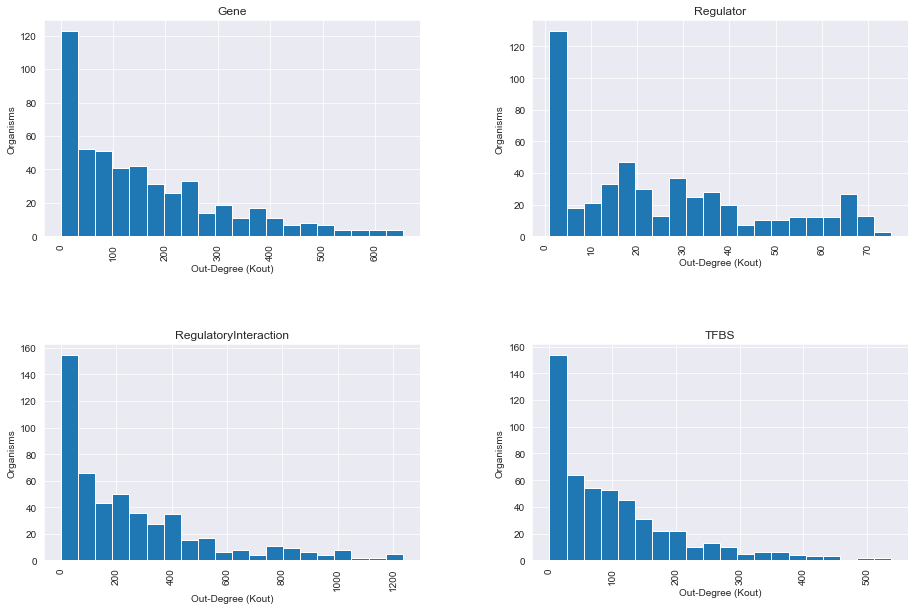

In [19]:
import matplotlib.pyplot as plt
hist = organism_degree[['Out-Degree (Kout)', 'label']].hist(by='label', bins=20, figsize=(15, 10))

for ax in hist.flatten():
    ax.set_xlabel("Out-Degree (Kout)")
    ax.set_ylabel("Organisms")

plt.savefig("organism_degree.png", bbox_inches="tight", dpi=150)
plt.show()

c:\users\bisbii\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


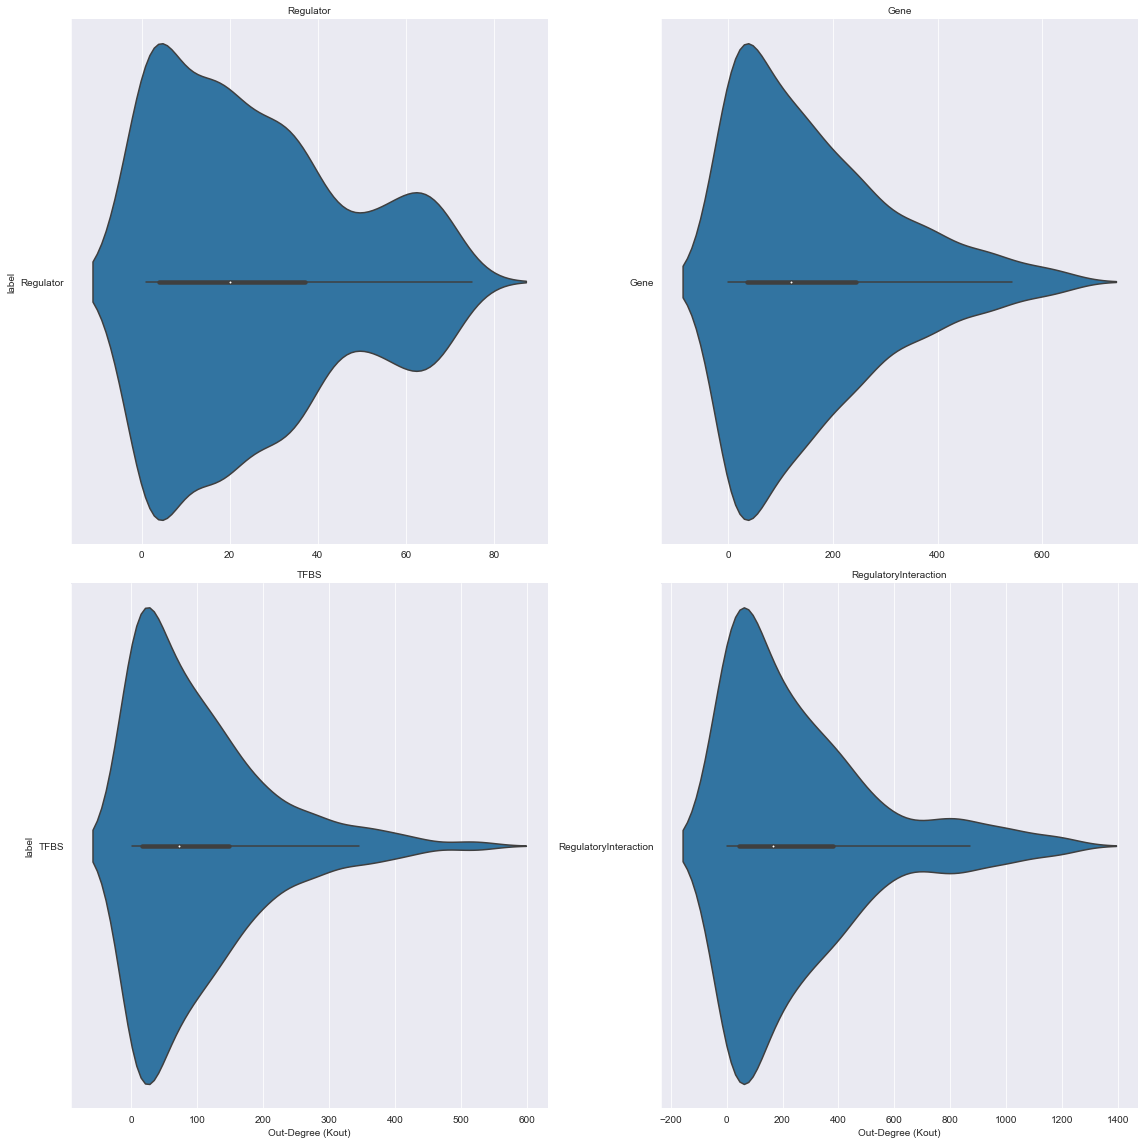

In [20]:
import seaborn as sns
g = sns.FacetGrid(organism_degree,
                  col="label",
                  col_wrap=2,
                  palette="Set3",
                  sharex=False,
                  sharey=False,
                  height=8)

g.map(sns.violinplot,
      "Out-Degree (Kout)",
      "label")

g.set_titles("{col_name}")

plt.savefig("organism_degree_violin.png", bbox_inches="tight", dpi=150)
plt.show()

In [21]:
import pandas as pd

# organism top out-degree distribution
top_dfs = []
for label in ('Regulator', 'Gene', 'TFBS', 'RegulatoryInteraction'):

    res = neo_db.db.cypher_query(f"match(o:Organism)-[]-(r:{label}) return o.protrend_id, o.name, count(distinct(r.protrend_id))")

    tmp = pd.DataFrame(res[0], columns=['Organism ID', 'Organism Name', 'Out-Degree (Kout)'])
    tmp['label'] = label
    top_dfs.append(tmp)

top_degree = pd.concat(top_dfs, ignore_index=True)
top_degree = top_degree.set_index('Organism ID')
top_degree

,Organism Name,Out-Degree (Kout),label
Organism ID,,,
PRT.ORG.0000002,Acidobacterium capsulatum ATCC 51196,1,Regulator
PRT.ORG.0000003,Acinetobacter baumannii ATCC 17978,1,Regulator
PRT.ORG.0000004,Actinobacillus pleuropneumoniae serovar 5b str...,1,Regulator
PRT.ORG.0000005,Actinobacillus pleuropneumoniae serovar 7 str....,27,Regulator
PRT.ORG.0000006,Agrobacterium fabrum str. C58,66,Regulator
...,...,...,...
PRT.ORG.0000609,Idiomarina baltica OS145,223,RegulatoryInteraction
PRT.ORG.0000610,Glaciecola sp. HTCC2999,199,RegulatoryInteraction
PRT.ORG.0000611,Colwellia psychrerythraea 34H,414,RegulatoryInteraction


In [22]:
# get top 30 regulators
top_degree_regulators = top_degree[top_degree['label'] == 'Regulator'].sort_values(by='Out-Degree (Kout)', ascending=False).head(30)
top_degree_regulators

,Organism Name,Out-Degree (Kout),label
Organism ID,,,
PRT.ORG.0000012,Bacillus subtilis subsp. subtilis str. 168,279,Regulator
PRT.ORG.0000035,Escherichia coli str. K-12 substr. MG1655,246,Regulator
PRT.ORG.0000028,Corynebacterium glutamicum ATCC 13032,188,Regulator
PRT.ORG.0000074,Pseudomonas aeruginosa PAO1,175,Regulator
PRT.ORG.0000170,Bacillus licheniformis DSM 13 = ATCC 14580,152,Regulator
PRT.ORG.0000010,Bacillus velezensis FZB42,141,Regulator
PRT.ORG.0000060,Mycobacterium tuberculosis H37Rv,131,Regulator
PRT.ORG.0000169,Bacillus pumilus SAFR-032,125,Regulator
PRT.ORG.0000171,Halalkalibacterium halodurans C-125,116,Regulator


In [23]:
# selecting rows for the top 30 regulators
top_degree_data = top_degree.loc[top_degree_regulators.index, :]
top_degree_data = top_degree_data.reset_index()
top_degree_data

,Organism ID,Organism Name,Out-Degree (Kout),label
0,PRT.ORG.0000012,Bacillus subtilis subsp. subtilis str. 168,279,Regulator
1,PRT.ORG.0000012,Bacillus subtilis subsp. subtilis str. 168,2274,Gene
2,PRT.ORG.0000012,Bacillus subtilis subsp. subtilis str. 168,2777,TFBS
3,PRT.ORG.0000012,Bacillus subtilis subsp. subtilis str. 168,11294,RegulatoryInteraction
4,PRT.ORG.0000035,Escherichia coli str. K-12 substr. MG1655,246,Regulator
...,...,...,...,...
115,PRT.ORG.0000368,Shewanella sp. MR-4,1450,RegulatoryInteraction
116,PRT.ORG.0000367,Shewanella sp. MR-7,74,Regulator
117,PRT.ORG.0000367,Shewanella sp. MR-7,807,Gene
118,PRT.ORG.0000367,Shewanella sp. MR-7,652,TFBS


c:\users\bisbii\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


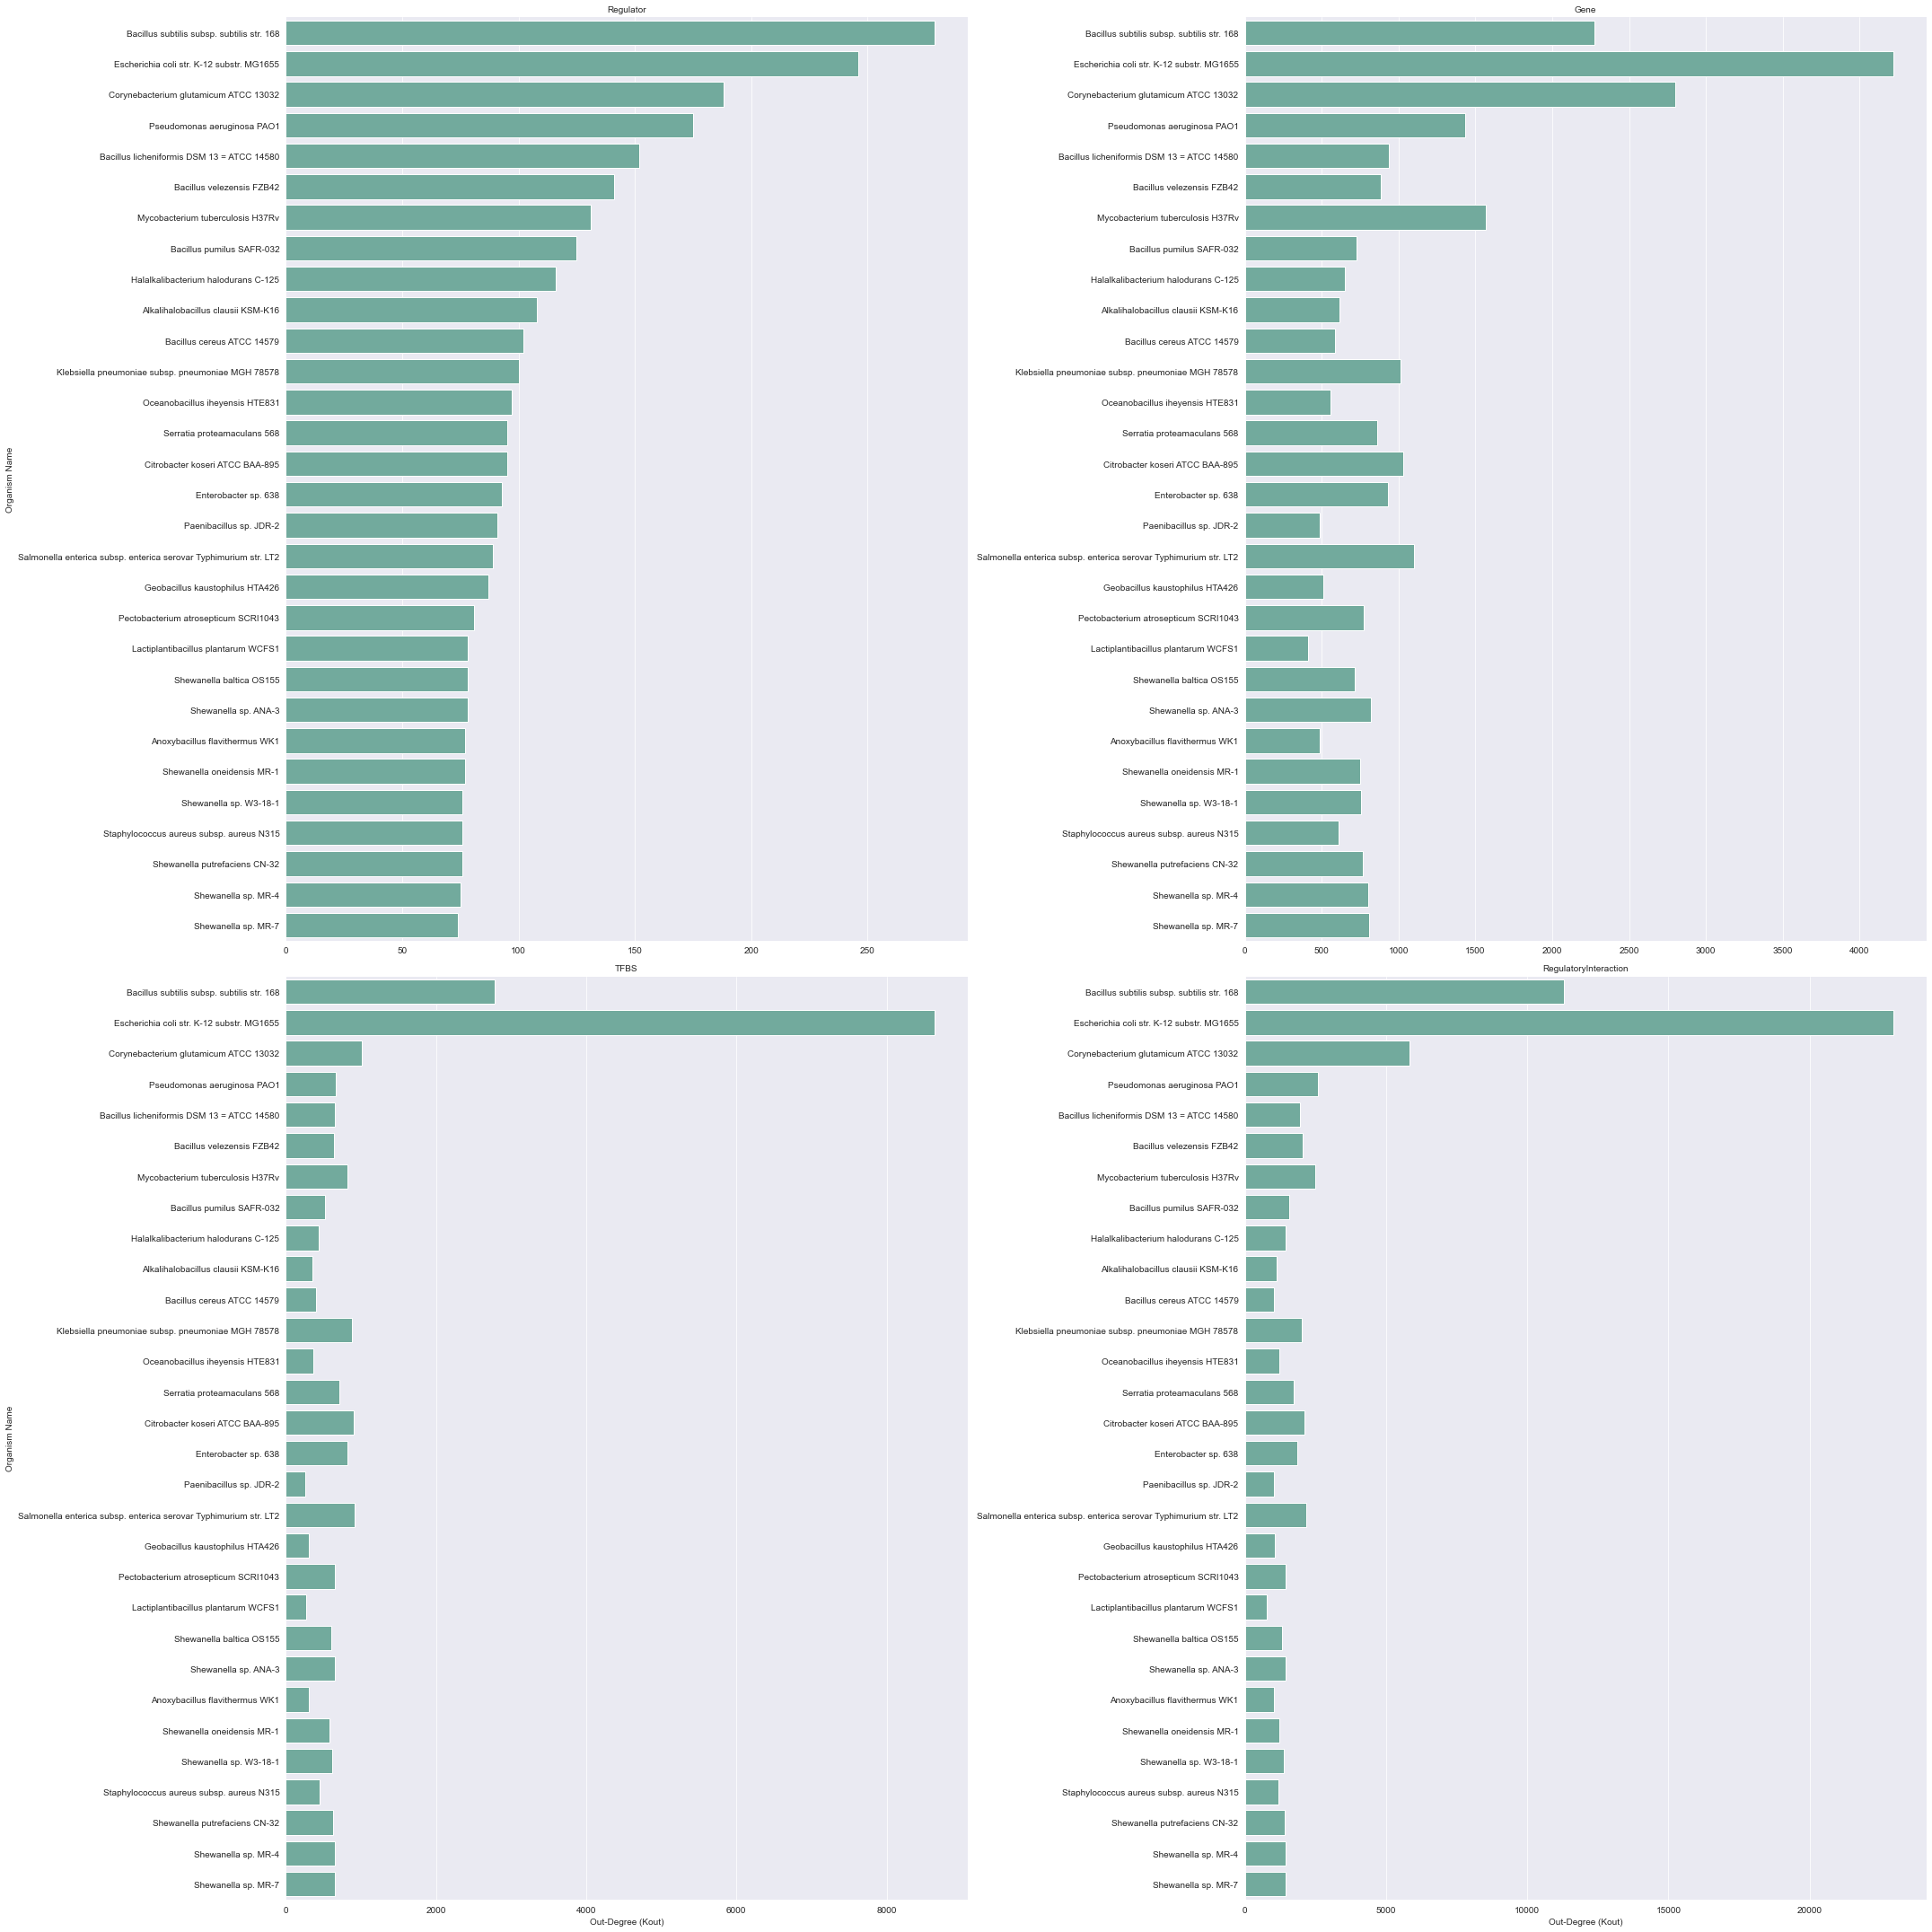

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(top_degree_data,
                  col="label",
                  col_wrap=2,
                  palette="Set3",
                  sharex=False,
                  sharey=False,
                  height=15)

g.map(sns.barplot,
      "Out-Degree (Kout)",
      "Organism Name",
      estimator=sum,
      ci=None,
      color='#69b3a2')

g.set_titles("{col_name}")

plt.savefig("organism_degree_top.png", bbox_inches="tight", dpi=150)
plt.show()

In [25]:
import pandas as pd

# regulator out-degree distribution
regulator_dfs = []
for label in ('Gene', 'TFBS', 'RegulatoryInteraction'):

    res = neo_db.db.cypher_query(f"match(o:Regulator)-[]-(r:{label}) return o.protrend_id, count(distinct(r.protrend_id))")

    tmp = pd.DataFrame(res[0], columns=['Regulator', 'Out-Degree (Kout)'])
    quantile = tmp['Out-Degree (Kout)'].quantile(0.95)
    tmp = tmp[tmp['Out-Degree (Kout)'] < quantile]
    tmp['label'] = label

    regulator_dfs.append(tmp)

regulator_degree = pd.concat(regulator_dfs, ignore_index=True)
regulator_degree

,Regulator,Out-Degree (Kout),label
0,PRT.REG.0000001,2,Gene
1,PRT.REG.0000002,1,Gene
2,PRT.REG.0000003,3,Gene
3,PRT.REG.0000004,1,Gene
4,PRT.REG.0000005,1,Gene
...,...,...,...
45123,PRT.REG.0016174,4,RegulatoryInteraction
45124,PRT.REG.0016175,1,RegulatoryInteraction
45125,PRT.REG.0016176,1,RegulatoryInteraction
45126,PRT.REG.0016177,3,RegulatoryInteraction


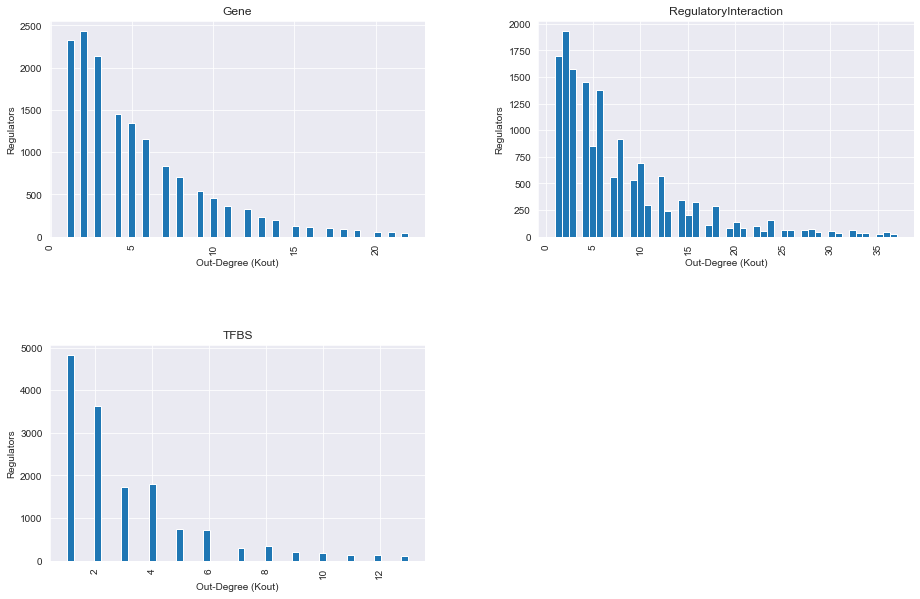

In [26]:
import matplotlib.pyplot as plt
hist = regulator_degree[['Out-Degree (Kout)', 'label']].hist(by='label', bins=50, figsize=(15, 10))

for ax in hist.flatten():
    ax.set_xlabel("Out-Degree (Kout)")
    ax.set_ylabel("Regulators")

plt.savefig("regulator_degree.png", bbox_inches="tight", dpi=150)
plt.show()

c:\users\bisbii\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


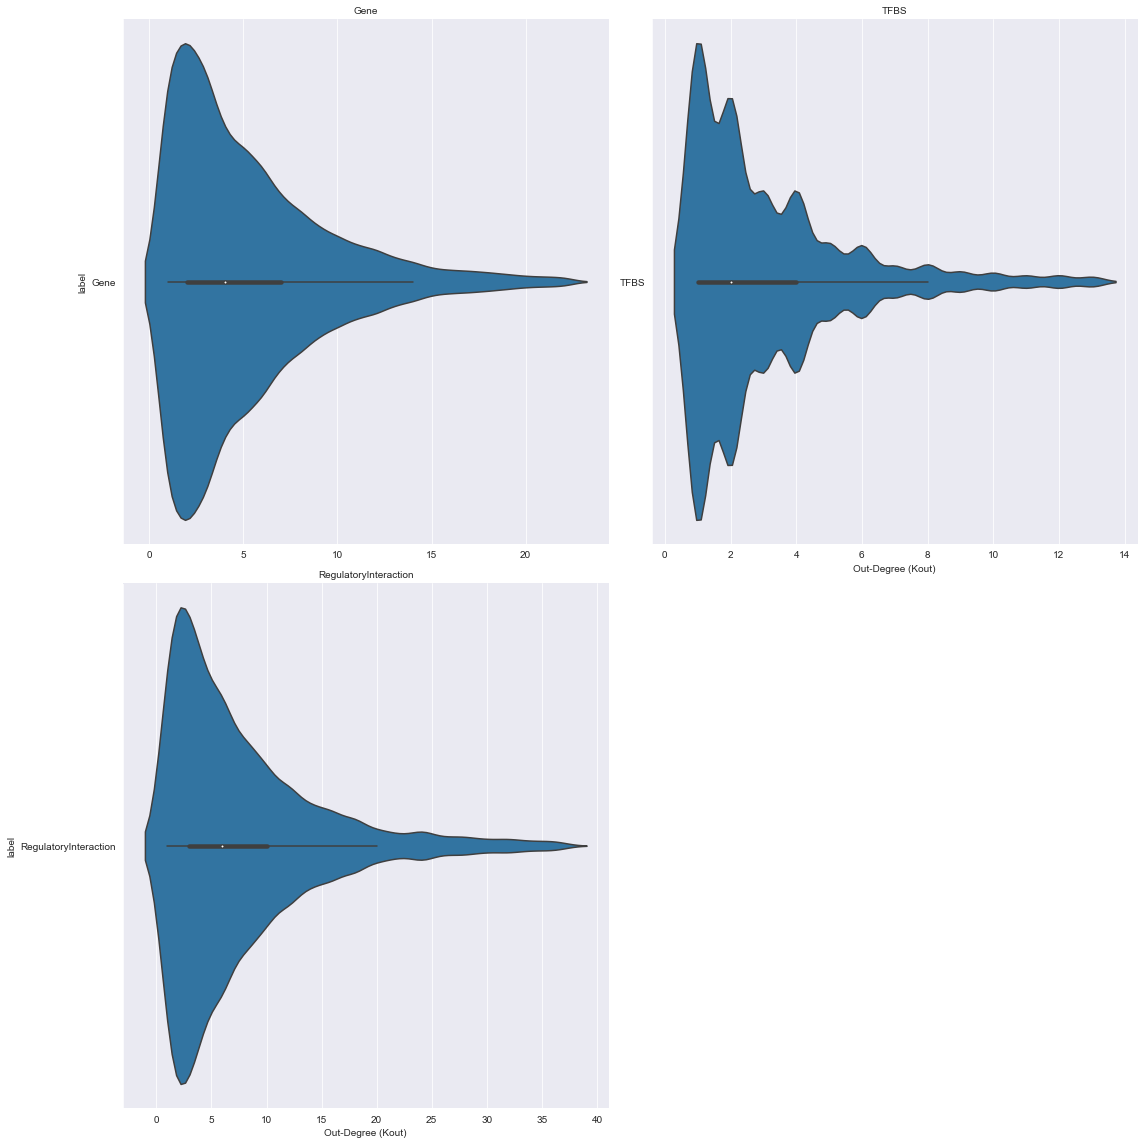

In [27]:
import seaborn as sns
g = sns.FacetGrid(regulator_degree,
                  col="label",
                  col_wrap=2,
                  palette="Set3",
                  sharex=False,
                  sharey=False,
                  height=8)

g.map(sns.violinplot,
      "Out-Degree (Kout)",
      "label")

g.set_titles("{col_name}")

plt.savefig("regulator_degree_violin.png", bbox_inches="tight", dpi=150)
plt.show()

In [59]:
from protrend.model import Regulator

# regulator mechanism table
regulators = Regulator.node_to_df()
mechanisms = regulators['mechanism'].value_counts()
mechanisms

transcription factor        12019
small rna (srna)             3565
unknown                       371
sigma factor                   26
transcription terminator        1
Name: mechanism, dtype: int64